In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Učitavam podatke iz Excel fajla "insurance.csv" u DataFrame pod nazivom df koristeći Pandas biblioteku.
df=pd.read_excel("insurance.csv")

In [3]:
#Prikazuje prvih pet redova DataFrame-a df
df.head()

,age,sex,bmi,children,smoker,region,charges,Medical id
0,19,female,27.900,0,yes,southwest,16884.92400,1.0
1,18,male,33.770,1,no,southeast,1725.55230,NaN
2,28,male,33.000,3,no,southeast,4449.46200,NaN
3,33,male,22.705,0,no,northwest,21984.47061,NaN
4,32,male,28.880,0,no,northwest,3866.85520,NaN


In [4]:
#Prikazuje poslednjih pet redova DataFrame-a df
df.tail()

,age,sex,bmi,children,smoker,region,charges,Medical id
1333,50,male,30.97,3,no,northwest,10600.5483,NaN
1334,18,female,31.92,0,no,northeast,2205.9808,NaN
1335,18,female,36.85,0,no,southeast,1629.8335,NaN
1336,21,female,25.80,0,no,southwest,2007.9450,NaN
1337,61,female,29.07,0,yes,northwest,29141.3603,80.0


In [5]:
#Vraća tuple koji sadrži broj redova i broj kolona u DataFrame df
df.shape

(1338, 8)

In [6]:
import seaborn as sns

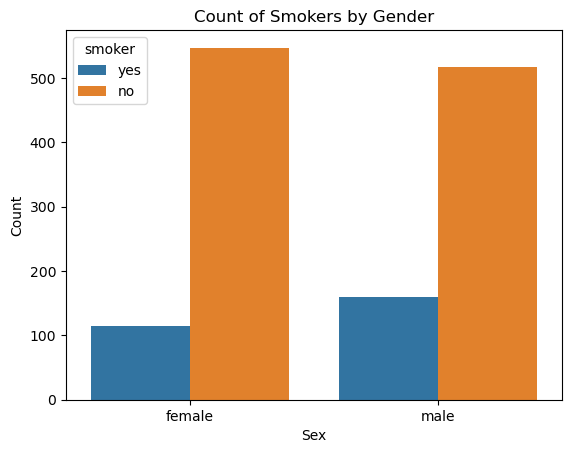

In [7]:
#Ove komande prikazuju count plot koji pokazuje broj pušača i nepušača za svaki pol
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Count of Smokers by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

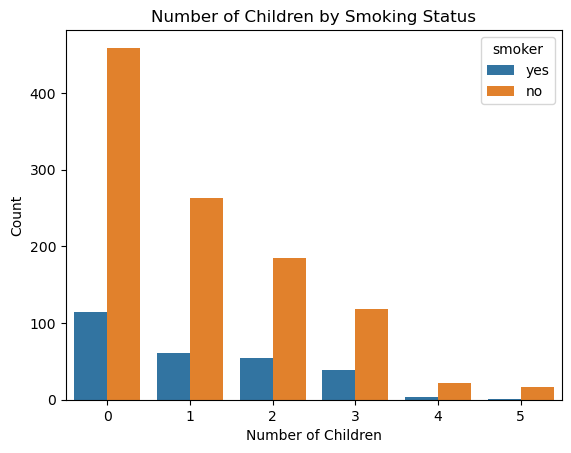

In [8]:
#Ove komande prikazuju count plot koji pokazuje broj djece za različite statuse pušenja
sns.countplot(x='children', hue='smoker', data=df)
plt.title('Number of Children by Smoking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

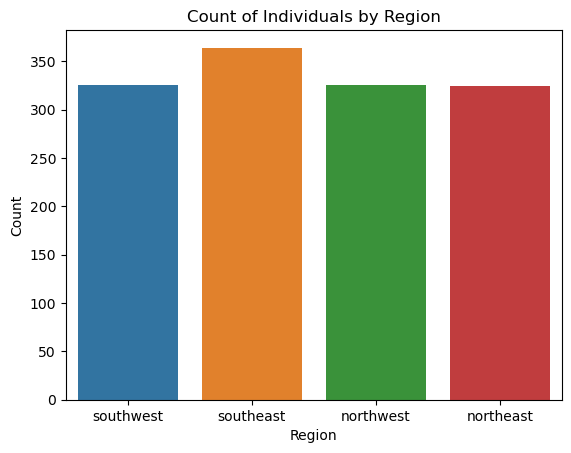

In [9]:
#Ove komande prikazuju count plot koji pokazuje broj pojedinaca u svakom regionu
sns.countplot(x='region', data=df)
plt.title('Count of Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

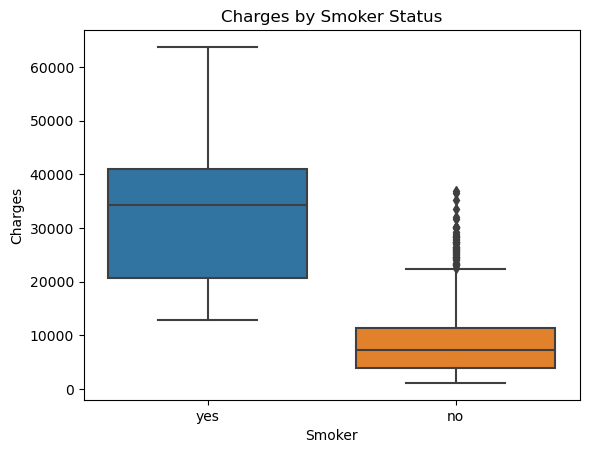

In [10]:
#Ove komande prikazuju box plot koji pokazuje raspodjelu troškova po statusu pušenja
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

C:\Users\Anjica\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anjica\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anjica\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anjica\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

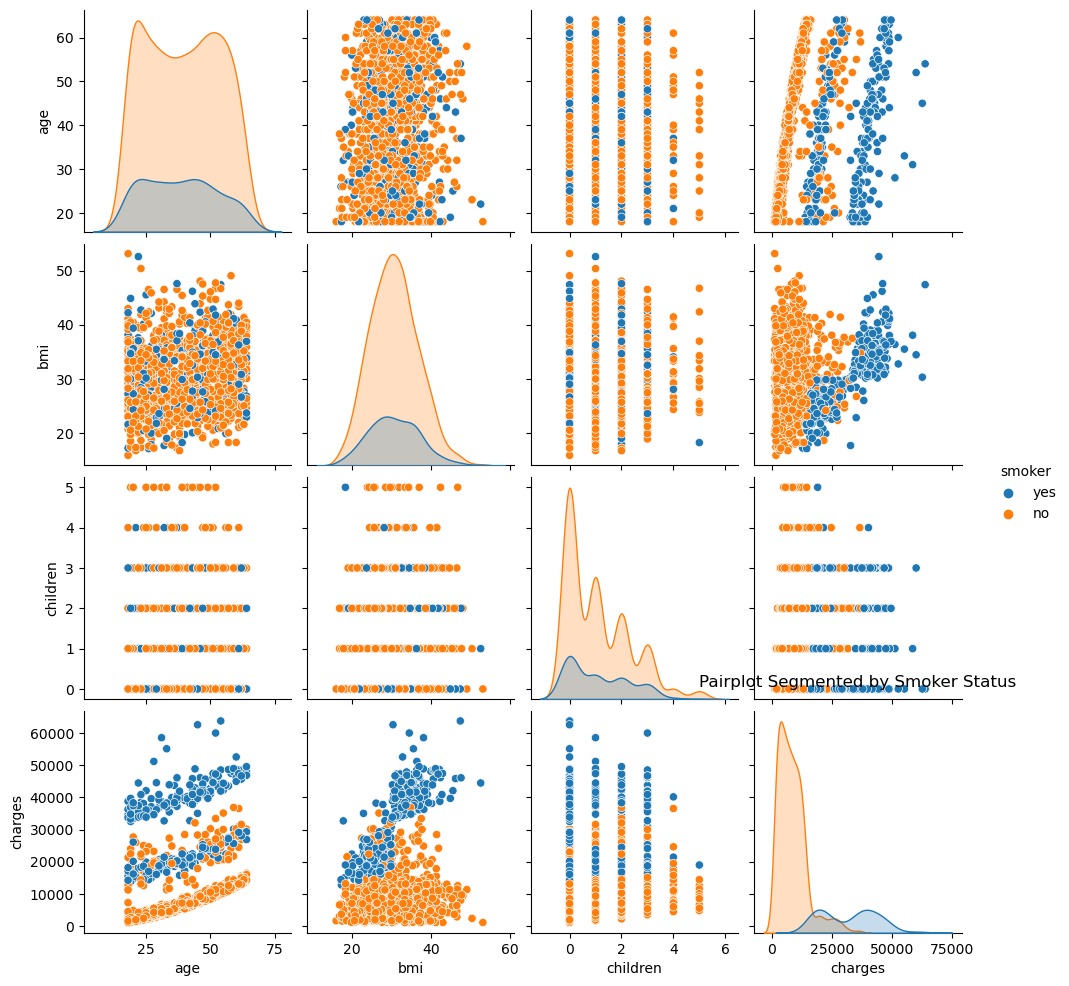

In [11]:
#Ove komande prikazuju pair plot koji prikazuje odnose između varijabli age, bmi, children, i charges, segmentiran po statusu pušenja (smoker)
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'smoker']], hue='smoker')
plt.title('Pairplot Segmented by Smoker Status')
plt.show()

<Axes: >

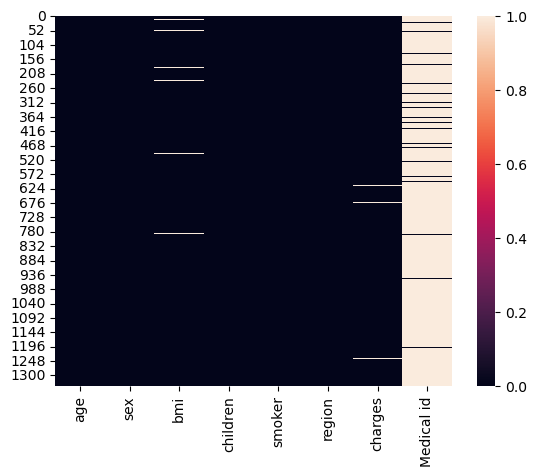

In [12]:
#Ove komande prikazuju heatmap koja vizualizuje nedostajuće vrijednosti u DataFrame-u df
sns.heatmap(df.isnull())

In [13]:
#Uklanjam kolonu Medical id iz DataFrame-a df
df=df.drop('Medical id',axis=1)

In [14]:
#Kreiram rječnik u Pythonu koji mapira stringove "male" i "female" na brojeve 0 i 1
rjecnik={"male":0,"female":1}

In [15]:
#Konvertujem vrijednosti u koloni sex DataFrame-a df prema rječniku rjecnik, zamenjujući "male" sa 0 i "female" sa 1
df['sex']=df['sex'].map(rjecnik)

In [16]:
rjecnikPusaci={"yes":1,"no":0}

In [17]:
df['smoker']=df['smoker'].map(rjecnikPusaci)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [19]:
#Vraća jedinstvene vrijednosti u koloni region DataFrame-a df
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
#One-hot encodinga
region_dummies = pd.get_dummies(df['region'], prefix='region')

In [21]:
region_dummies

,region_northeast,region_northwest,region_southeast,region_southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [22]:
#Spaja originalni DataFrame df sa DataFrame-om region_dummies
df = pd.concat([df, region_dummies], axis=1)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,southwest,16884.92400,False,False,False,True
1,18,0,33.770,1,0,southeast,1725.55230,False,False,True,False
2,28,0,33.000,3,0,southeast,4449.46200,False,False,True,False
3,33,0,22.705,0,0,northwest,21984.47061,False,True,False,False
4,32,0,28.880,0,0,northwest,3866.85520,False,True,False,False


In [24]:
#Uklanjam kolonu region iz DataFrame-a df
df = df.drop('region', axis=1)

In [25]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [26]:
df.head(13)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False
5,31,1,25.740,0,0,3756.62160,False,False,True,False
6,46,1,33.440,1,0,8240.58960,False,False,True,False
7,37,1,27.740,3,0,7281.50560,False,True,False,False
8,37,0,29.830,2,0,6406.41070,True,False,False,False
9,60,1,25.840,0,0,28923.13692,False,True,False,False


In [27]:
#Izračunavam prosječnu vrijednost (mean) kolone bmi u DataFrame-u df i dodjeljuje rezultat varijabli mean_bmi
mean_bmi = df['bmi'].mean()

In [28]:
mean_bmi

30.66912075471698

In [29]:
#Popunjavanje nedostajućih vrijednosti prosječnim vrijednostima za odgovarajuće godine i pol, transformise funkciju sa lambda izrazom koji popunjava NaN vrijednosti prosječnom vrijednošću za svaku grupu
df['bmi'] = df.groupby(['age', 'sex'])['bmi'].transform(lambda x: x.fillna(x.mean()))

In [30]:
df.head(13)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900000,0,1,16884.92400,False,False,False,True
1,18,0,33.770000,1,0,1725.55230,False,False,True,False
2,28,0,33.000000,3,0,4449.46200,False,False,True,False
3,33,0,22.705000,0,0,21984.47061,False,True,False,False
4,32,0,28.880000,0,0,3866.85520,False,True,False,False
5,31,1,25.740000,0,0,3756.62160,False,False,True,False
6,46,1,33.440000,1,0,8240.58960,False,False,True,False
7,37,1,27.740000,3,0,7281.50560,False,True,False,False
8,37,0,29.830000,2,0,6406.41070,True,False,False,False
9,60,1,25.840000,0,0,28923.13692,False,True,False,False


In [31]:
df=df.dropna()

<Axes: >

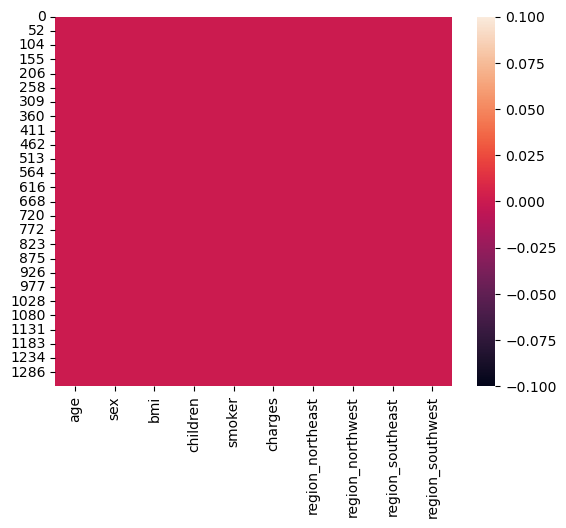

In [32]:
sns.heatmap(df.isnull())

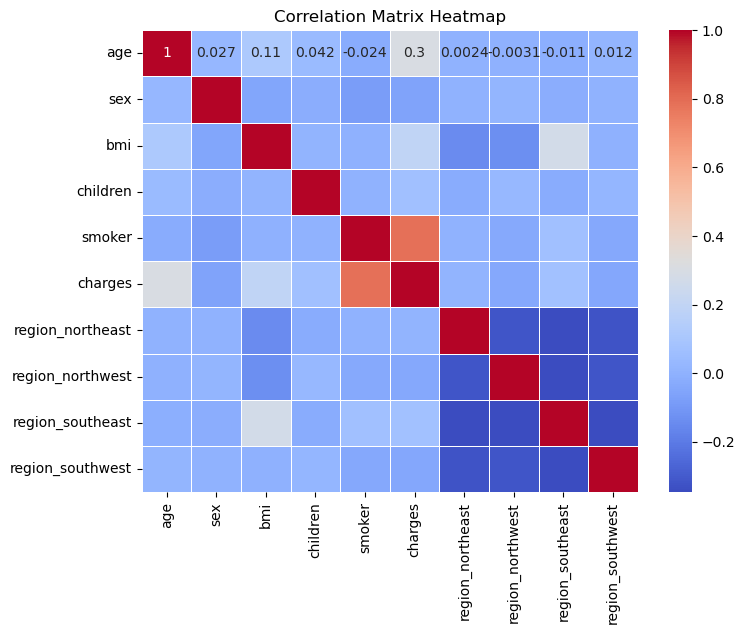

In [33]:
#Ove komande generišu heatmap koja vizualizuje korelacije između različitih kolona u DataFrame-u df
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

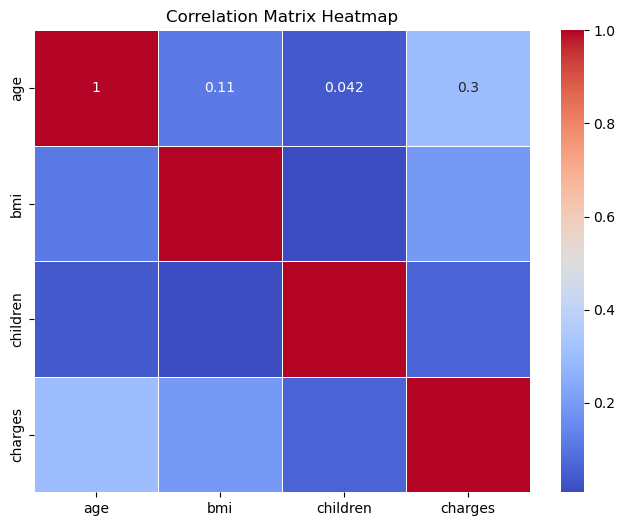

In [34]:
#Ove komande generišu heatmap koja vizualizuje korelacije između specifičnih kolona age, bmi, children, i charges u DataFrame-u df
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
X = df.drop('charges', axis=1) 

In [36]:
y = df['charges']

In [37]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,False,False,False,True
1,18,0,33.770,1,0,False,False,True,False
2,28,0,33.000,3,0,False,False,True,False
3,33,0,22.705,0,0,False,True,False,False
4,32,0,28.880,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,False,True,False,False
1334,18,1,31.920,0,0,True,False,False,False
1335,18,1,36.850,0,0,False,False,True,False
1336,21,1,25.800,0,0,False,False,False,True


In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1325, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#Ova komanda dijeli podatke na obučavajući i testirajući skup
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
711,50,1,23.540,2,0,False,False,True,False
172,18,0,15.960,0,0,True,False,False,False
273,50,0,27.455,1,0,True,False,False,False
898,18,1,40.260,0,0,False,False,True,False
211,40,0,30.875,4,0,False,True,False,False


In [42]:
y_train.head()

711    10107.22060
172     1694.79640
273     9617.66245
898     1634.57340
211     8162.71625
Name: charges, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [44]:
standardScaler=StandardScaler()

In [45]:
X_train_scaled=standardScaler.fit_transform(X_train)

In [46]:
X_test_scaled=standardScaler.transform(X_test)

In [47]:
minMaxScaler=MinMaxScaler()

In [48]:
X_train_minMaxScaled=minMaxScaler.fit_transform(X_train)

In [49]:
X_test_minMaxScaled=minMaxScaler.transform(X_test)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def print_metrics(y_true, y_pred, name, tip):
    
    # Izračunavanje metričkih vrijednosti
    MAE = np.mean(np.abs(y_true - y_pred))
    MSE = np.mean(np.square(y_true - y_pred))
    RMSE = np.sqrt(MSE)
    Mean_y_true = np.mean(y_true)
    CV = RMSE / Mean_y_true
    MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Izračunavanje MAPE
    
    # Ispisivanje metričkih vrijednosti
    print(f"Model {name}, Type {tip}")
    print(f"Mean Absolute Error: {MAE}")
    print(f"Mean Squared Error: {MSE}")
    print(f"Root Mean Squared Error: {RMSE}")
    print(f"Coefficient of Variation (y_true): {CV}")
    print(f"Mean Absolute Percentage Error: {MAPE}%")  # Ispis MAPE
    
    # Kreiranje rječnika za čuvanje metričkih vrijednosti
    recnik = {"MAE": MAE, "MSE": MSE, "RMSE": RMSE, "CV": CV, "MAPE": MAPE}

    # Ažuriranje globalnog rječnika metrika
    global metrika
    if name in metrika.keys():
        metrika[name][tip] = recnik
    else:
        metrika[name] = {}
        metrika[name][tip] = recnik

    # Vizualizacija metričkih vrijednosti
    metrics = ['MAE', 'MSE', 'RMSE', 'CV', 'MAPE']
    values = [MAE, MSE, RMSE, CV, MAPE]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(metrics, values, color=['blue', 'red', 'green', 'purple', 'orange'])
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(f'Error Metrics for Model {name}, Type {tip}')
    plt.yscale('log')  # Postavljanje y-ose na logaritamsku skalu

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2e}", va='bottom')  # Formatiranje vrijednosti kao naučna notacija

    plt.show()


In [51]:
metrika = {}

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [54]:
#Standard Scaler

In [55]:
#Trenira model linearne regresije lr koristeći standardizovane podatke za obučavanje
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [56]:
#Koristim trenirani model linearne regresije lr da predvidi ciljne vrijednosti za standardizovane test podatke
predictions=lr.predict(X_test_scaled)

In [57]:
predictions

array([ 1503.79387413,  4459.5323689 , 17400.79240862, 11108.96909373,
        6304.10813333,  1796.49795035, 13703.27513071,  4835.80207844,
        5209.23110086, 33243.49006641,  5573.52469097,  1372.51688906,
       12103.9752245 ,  4521.77124432, 38331.33576211,  2826.47179885,
        7003.40962653,  2599.89053609,  4882.63224915, 17059.24800338,
       11285.21623502, 33157.80522141,  9731.62712857, 15028.98896362,
        4013.54095932, 16280.40414862, 32616.16220746,  3745.03138613,
       15267.18162594, 13020.14206212,  2623.44850707, 15011.70872304,
        7107.86112286, 16892.8895945 , 10485.00977517, 36309.1833882 ,
        3024.80584191, 18030.45565654,  8631.224629  ,  8180.08650245,
        4919.34763968,  6703.15604391,  9551.81270205,  8652.90446229,
       28152.77932748, 12606.18190869, 11529.74921331,  2609.63307547,
        3592.60439134, 11922.74866081, 10331.33003375, 15082.43545771,
        5890.5313722 ,  3033.06710959,  6901.2498986 ,  1307.65698854,
      

Model Linearna Regresija, Type Linear Regresija Standard Scaler
Mean Absolute Error: 4347.849988543627
Mean Squared Error: 38985507.63142416
Root Mean Squared Error: 6243.83757247289
Coefficient of Variation (y_true): 0.46259358500189285
Mean Absolute Percentage Error: 41.95968081398973%


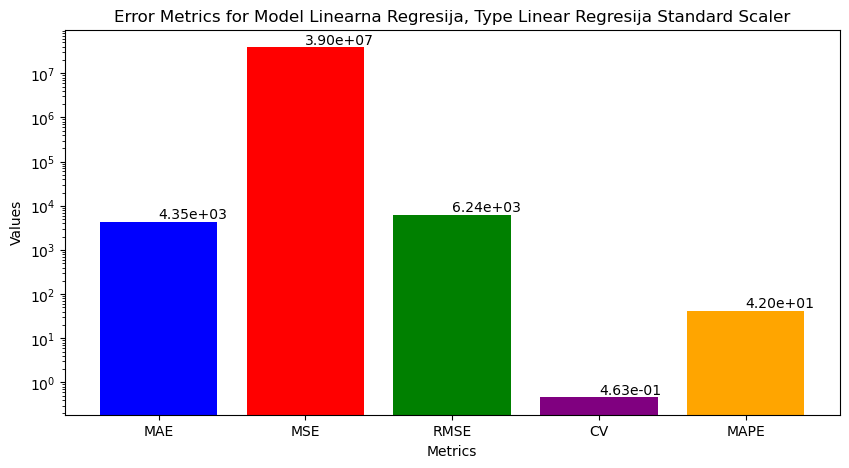

In [58]:
print_metrics(y_test,predictions,"Linearna Regresija","Linear Regresija Standard Scaler")

In [59]:
#Min Max Scaler

In [60]:
lrMinMax=LinearRegression()

In [61]:
lrMinMax.fit(X_train_minMaxScaled,y_train)

LinearRegression()

In [62]:
predictionsMinMax=lrMinMax.predict(X_test_minMaxScaled)

Model Linearna Regresija, Type Linear Regresija MinMax Scaler
Mean Absolute Error: 4347.849988543627
Mean Squared Error: 38985507.63142415
Root Mean Squared Error: 6243.83757247289
Coefficient of Variation (y_true): 0.46259358500189285
Mean Absolute Percentage Error: 41.95968081398977%


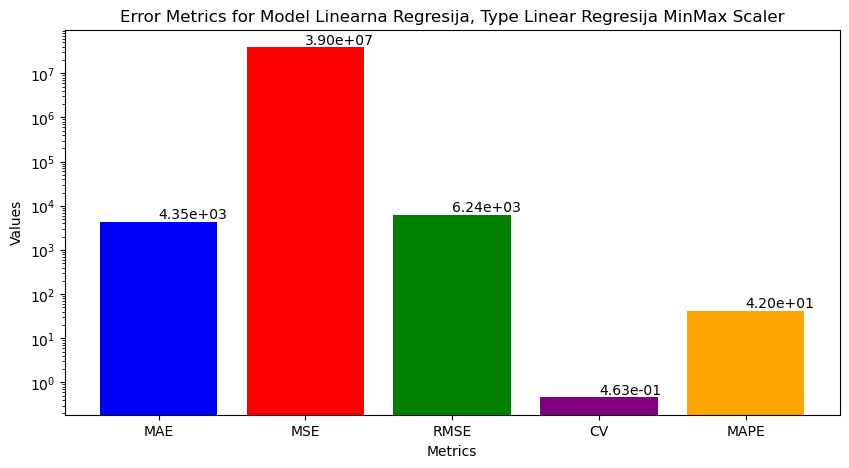

In [63]:
print_metrics(y_test,predictionsMinMax,"Linearna Regresija","Linear Regresija MinMax Scaler")

In [64]:
#Lasso regresija

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso=Lasso(alpha=0.1)

In [67]:
#Standard Scaler

In [68]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [69]:
predictions=lasso.predict(X_test_scaled)

Model Linearna Regresija, Type Lasso Standard Scaler
Mean Absolute Error: 4347.805006114386
Mean Squared Error: 38984910.24373242
Root Mean Squared Error: 6243.789734106396
Coefficient of Variation (y_true): 0.4625900407518703
Mean Absolute Percentage Error: 41.95901980991256%


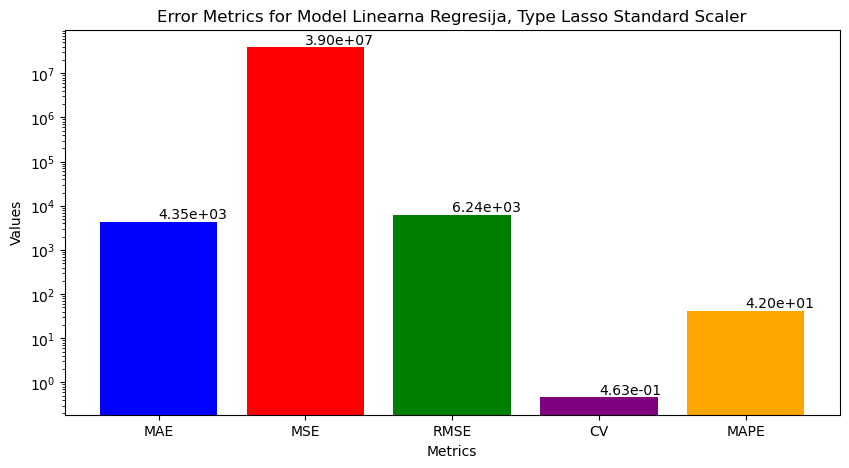

In [70]:
print_metrics(y_test,predictions,"Linearna Regresija","Lasso Standard Scaler")

In [71]:
#Min Max Scaler

In [72]:
lassoMinMax = Lasso(alpha=0.1)

In [73]:
lassoMinMax.fit(X_train_minMaxScaled, y_train)

Lasso(alpha=0.1)

In [74]:
predictionsMinMaxLasso = lassoMinMax.predict(X_test_minMaxScaled)

Model Linearna Regresija, Type Lasso MinMax Scaler
Mean Absolute Error: 4347.621265956909
Mean Squared Error: 38984128.22394713
Root Mean Squared Error: 6243.727109983838
Coefficient of Variation (y_true): 0.46258540105440454
Mean Absolute Percentage Error: 41.954346316908875%


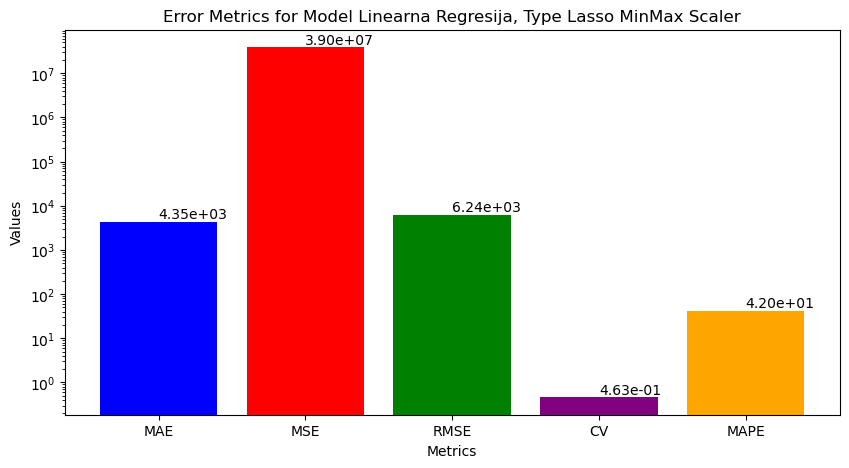

In [75]:
print_metrics(y_test, predictionsMinMaxLasso, "Linearna Regresija", "Lasso MinMax Scaler") 

In [76]:
#Ridge regresija

In [77]:
from sklearn.linear_model import Ridge

In [78]:
#Standard Scaler

In [79]:
ridgeModel = Ridge(alpha=1.0)

In [80]:
ridgeModel.fit(X_train_scaled, y_train)

Ridge()

In [81]:
predictions = ridgeModel.predict(X_test_scaled)

Model Linearna Regresija, Type Ridge Standard Scaler
Mean Absolute Error: 4348.387829998111
Mean Squared Error: 38972555.012195736
Root Mean Squared Error: 6242.80025406834
Coefficient of Variation (y_true): 0.46251673213152594
Mean Absolute Percentage Error: 41.97498912994191%


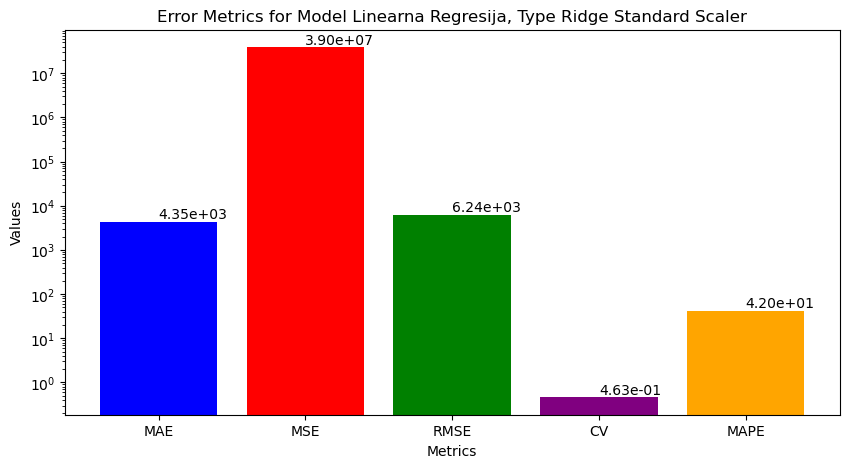

In [82]:
print_metrics(y_test, predictions, "Linearna Regresija", "Ridge Standard Scaler")

In [83]:
#Min Max Scaler

In [84]:
ridgeModel.fit(X_train_minMaxScaled, y_train)

Ridge()

In [85]:
predictions = ridgeModel.predict(X_test_minMaxScaled)

Model Linearna Regresija, Type Ridge MinMax Scaler
Mean Absolute Error: 4336.340290494808
Mean Squared Error: 38932310.61450665
Root Mean Squared Error: 6239.5761566397
Coefficient of Variation (y_true): 0.46227786512536206
Mean Absolute Percentage Error: 41.5224225120756%


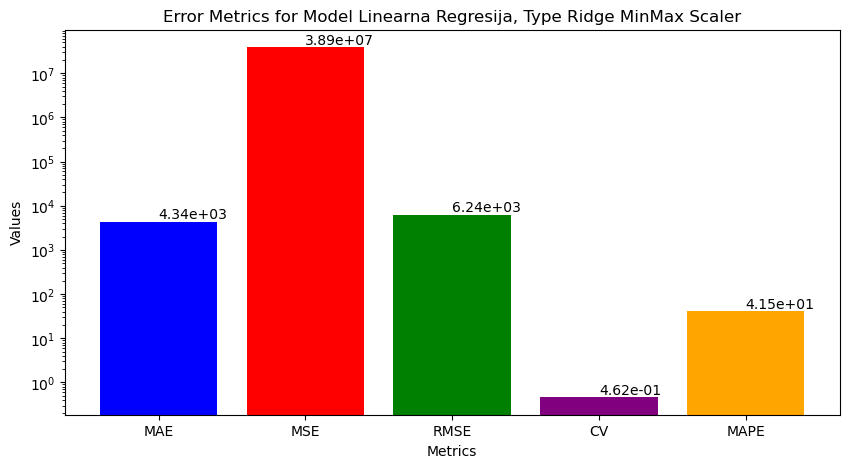

In [86]:
print_metrics(y_test, predictions, "Linearna Regresija", "Ridge MinMax Scaler")

In [87]:
#Support Vector Regression (SVR)

In [88]:
from sklearn.svm import SVR

In [89]:
svr = SVR()

In [90]:
#Standard Scaler

In [91]:
svr.fit(X_train_scaled,y_train)

SVR()

In [92]:
predictionsSVR=svr.predict(X_test_scaled)

Model Support Vector Regressor, Type Support Vector Regressor Standard Scaler
Mean Absolute Error: 8507.524384226374
Mean Squared Error: 160282829.3399196
Root Mean Squared Error: 12660.285515734611
Coefficient of Variation (y_true): 0.9379755312167259
Mean Absolute Percentage Error: 105.47403134715188%


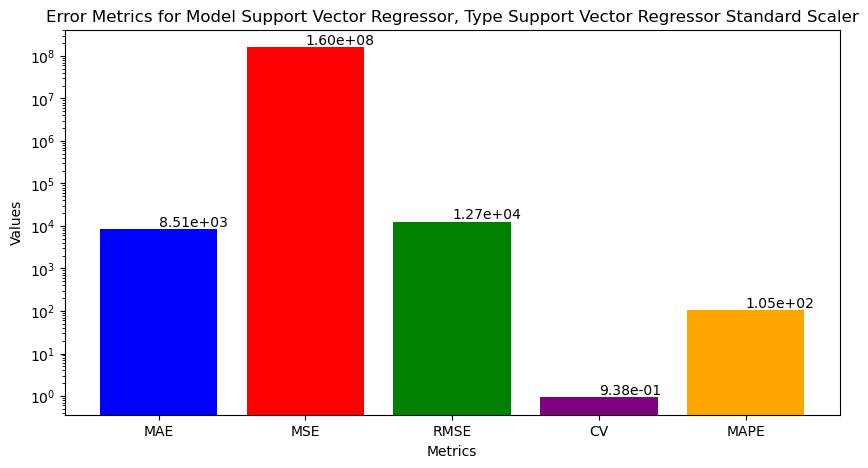

In [93]:
print_metrics(y_test,predictionsSVR,"Support Vector Regressor","Support Vector Regressor Standard Scaler")

In [94]:
#Min Max Scaler

In [95]:
svr.fit(X_train_minMaxScaled,y_train)

SVR()

In [96]:
predictionsSVR=svr.predict(X_test_minMaxScaled)

Model Support Vector Regressor, Type Support Vector Regressor MinMax Scaler
Mean Absolute Error: 8509.519741765998
Mean Squared Error: 160223329.5725344
Root Mean Squared Error: 12657.935438788365
Coefficient of Variation (y_true): 0.9378014186606295
Mean Absolute Percentage Error: 105.61362149838965%


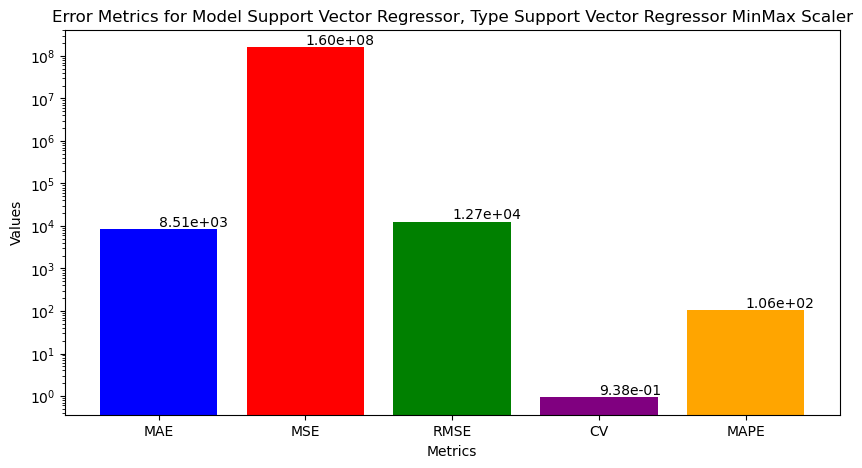

In [97]:
print_metrics(y_test,predictionsSVR,"Support Vector Regressor","Support Vector Regressor MinMax Scaler")

In [98]:
#Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
DTR=DecisionTreeRegressor()

In [101]:
#Stndard Scaler

In [102]:
DTR.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [103]:
predictions=DTR.predict(X_test_scaled)

Model Decision Tree Regressor, Type Standard Scaler
Mean Absolute Error: 3021.0111937735855
Mean Squared Error: 43888992.71624648
Root Mean Squared Error: 6624.876807627933
Coefficient of Variation (y_true): 0.4908240288228297
Mean Absolute Percentage Error: 27.1753249573224%


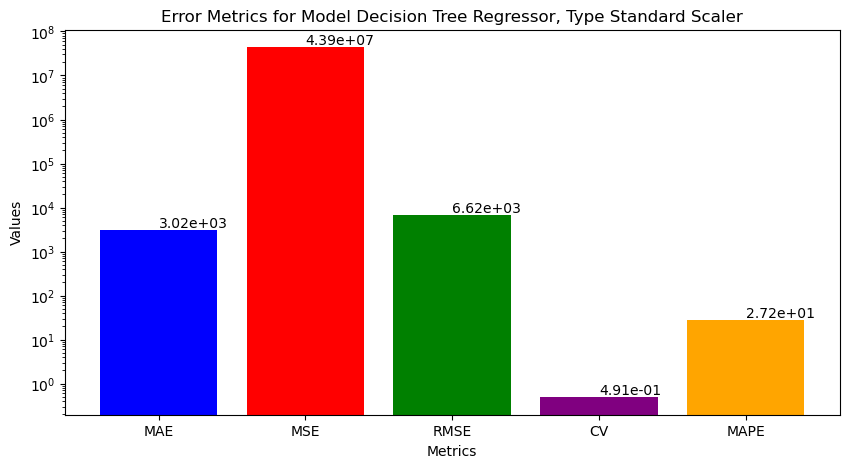

In [104]:
print_metrics(y_test,predictions,"Decision Tree Regressor", "Standard Scaler")

In [105]:
#Min Max Scaler

In [106]:
DTR.fit(X_train_minMaxScaled,y_train)

DecisionTreeRegressor()

In [107]:
predictions=DTR.predict(X_test_minMaxScaled)

Model Decision Tree Regressor, Type MinMax Scaler
Mean Absolute Error: 2994.3389741132078
Mean Squared Error: 41932317.251919135
Root Mean Squared Error: 6475.516755589405
Coefficient of Variation (y_true): 0.47975823777259785
Mean Absolute Percentage Error: 27.339158271786363%


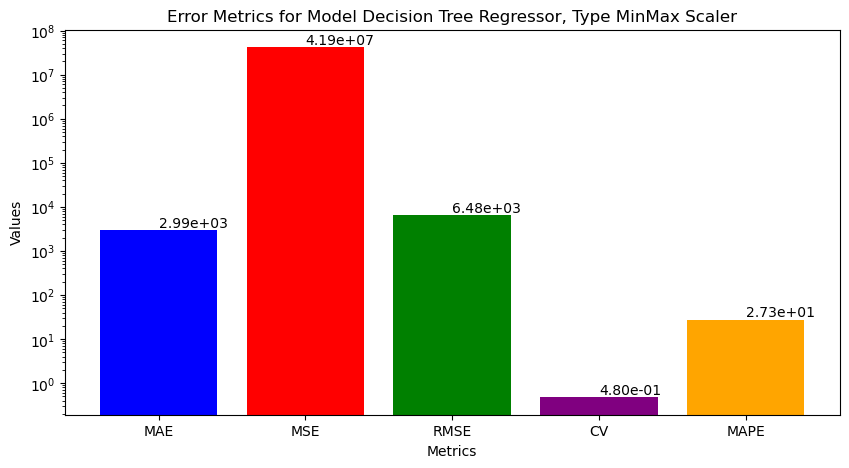

In [108]:
print_metrics(y_test,predictions,"Decision Tree Regressor", "MinMax Scaler")

In [109]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)


model = LinearRegression()


mse_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
     
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    predictions = model.predict(X_test)
    
    # Calculate MSE and store it
    mse = np.mean(np.square(y_test-predictions))
    mse_scores.append(mse)
    print(f"MSE for the fold: {mse}")

MSE for the fold: 40032645.62260885
MSE for the fold: 37461796.51092641
MSE for the fold: 34366700.67266172
MSE for the fold: 36232881.62661675
MSE for the fold: 38096048.73329924


In [110]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print MSE for each fold
print("MSE for each fold:", mse_scores)

# Calculate and print the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f"Average MSE across all folds: {average_mse}")

MSE for each fold: [37564462.68481886 38220735.47422826 32704643.51355232 40028632.09107949
 37122792.78021872]
Average MSE across all folds: 37128253.30877953


In [111]:
#Neuronske mreze

In [112]:
import tensorflow as tf

C:\Users\Anjica\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 305210560.0000 - mae: 12798.1699 - root_mean_squared_error: 17463.2930 - val_loss: 346697440.0000 - val_mae: 13905.1025 - val_root_mean_squared_error: 18619.8125
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 295109376.0000 - mae: 12438.3750 - root_mean_squared_error: 17163.7852 - val_loss: 346570272.0000 - val_mae: 13900.5312 - val_root_mean_squared_error: 18616.3984
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 310545472.0000 - mae: 12932.7715 - root_mean_squared_error: 17617.1562 - val_loss: 346444768.0000 - val_mae: 13896.0166 - val_root_mean_squared_error: 18613.0273
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 325896704.0000 - mae: 13351.4287 - root_mean_squared_error: 18041.3750 - val_loss: 346319296.0000 - val_mae: 13891.5010 - val_root_mean_squared_error: 18609.6562
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 294907424.0000 - mae: 12684.3115 - root_mean_squared_erro

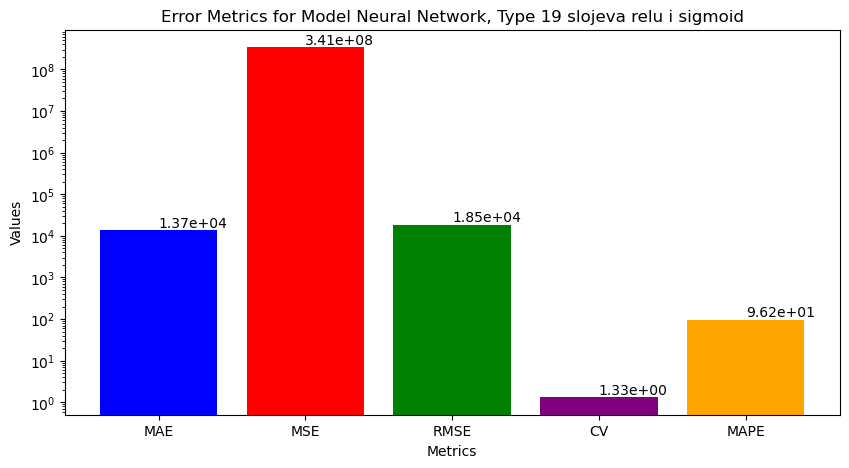

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
   tf.keras.layers.Dense(64, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(256, activation='sigmoid'), 
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dense(1024, activation='sigmoid'), 
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='sigmoid'),
    

    tf.keras.layers.Dense(1)  
])

# Kompilacija modela
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae","root_mean_squared_error"])

# Obuka modela
history=model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))
predictions=model.predict(X_test)
predictions=tf.squeeze(predictions).numpy()
print_metrics(y_test,predictions,"Neural Network","19 slojeva relu i sigmoid")

Epoch 1/50


C:\Users\Anjica\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 233985552.0000 - mae: 10942.6035 - root_mean_squared_error: 15221.1348 - val_loss: 168456720.0000 - val_mae: 7611.3213 - val_root_mean_squared_error: 12979.0879
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 132902976.0000 - mae: 8383.4961 - root_mean_squared_error: 11523.3965 - val_loss: 183407648.0000 - val_mae: 7893.4263 - val_root_mean_squared_error: 13542.8076
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 146867952.0000 - mae: 8176.5137 - root_mean_squared_error: 12105.3818 - val_loss: 136287728.0000 - val_mae: 9163.2363 - val_root_mean_squared_error: 11674.2334
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 140499552.0000 - mae: 8956.6387 - root_mean_squared_error: 11848.2422 - val_loss: 182546896.0000 - val_mae: 7928.4800 - val_root_mean_squared_error: 13510.9912
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 168547408.0000 - mae: 8983.7178 - root_mean_squared_error: 12955.7910 - va

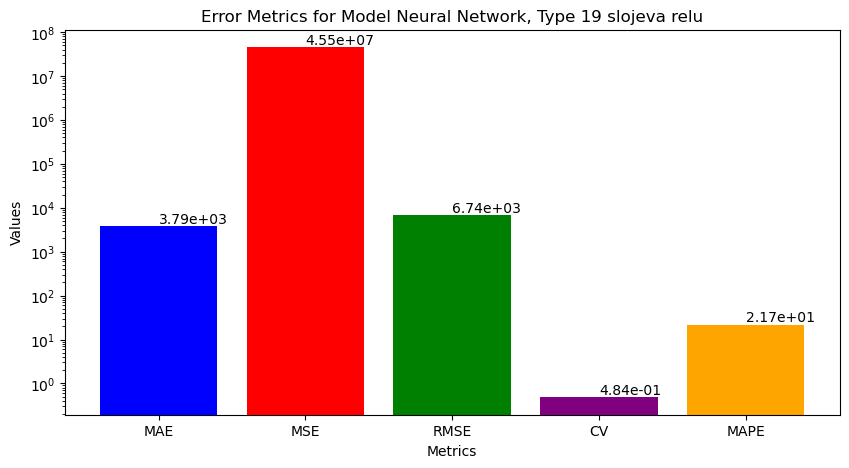

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'),
        

    tf.keras.layers.Dense(1)  
])

# Kompilacija modela
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae","root_mean_squared_error"])

# Obuka modela
history=model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))
predictions=model.predict(X_test)
predictions=tf.squeeze(predictions).numpy()
print_metrics(y_test,predictions,"Neural Network","19 slojeva relu")

Epoch 1/50


C:\Users\Anjica\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 332211872.0000 - mae: 13494.6582 - root_mean_squared_error: 18195.2910 - val_loss: 346729952.0000 - val_mae: 13906.2744 - val_root_mean_squared_error: 18620.6855
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 332981664.0000 - mae: 13507.7158 - root_mean_squared_error: 18238.1934 - val_loss: 346605888.0000 - val_mae: 13901.8115 - val_root_mean_squared_error: 18617.3535
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 319155264.0000 - mae: 13008.2773 - root_mean_squared_error: 17860.0664 - val_loss: 346480384.0000 - val_mae: 13897.2979 - val_root_mean_squared_error: 18613.9844
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 334995648.0000 - mae: 13426.5127 - root_mean_squared_error: 18288.4043 - val_loss: 346355168.0000 - val_mae: 13892.7910 - val_root_mean_squared_error: 18610.6191
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 318908736.0000 - mae: 13329.0342 - root_mean_squared_error: 17852.7

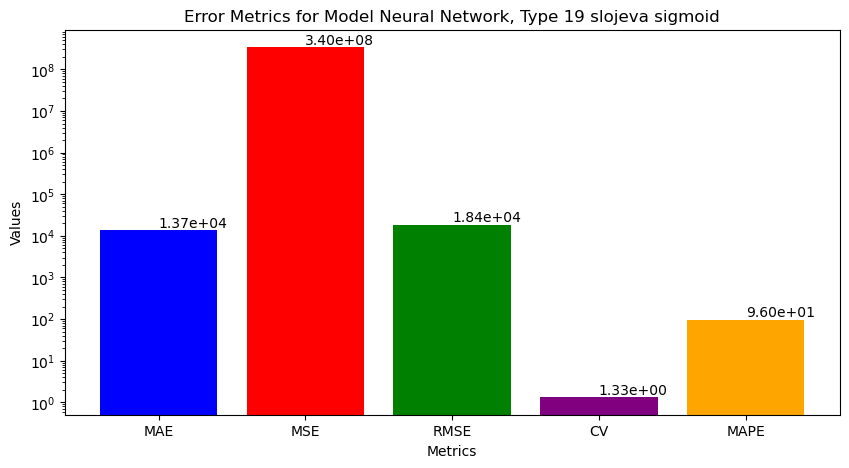

In [115]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='sigmoid'),  
    tf.keras.layers.Dense(256, activation='sigmoid'), 
    tf.keras.layers.Dense(512, activation='sigmoid'),  
    tf.keras.layers.Dense(1024, activation='sigmoid'), 
    tf.keras.layers.Dense(512, activation='sigmoid'),  
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    tf.keras.layers.Dense(512, activation='sigmoid'), 
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'), 
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(1)  
])

# Kompilacija modela
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae", "root_mean_squared_error"])

# Obuka modela
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predictions = tf.squeeze(predictions).numpy()
print_metrics(y_test, predictions, "Neural Network", "19 slojeva sigmoid")


In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
model = LinearRegression()

# Definisanje parametarskog prostora za GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treniranje modela sa različitim kombinacijama hiperparametara
grid_search.fit(X_train, y_train)

# Prikazivanje najboljih parametara
print("Najbolji parametri: ", grid_search.best_params_)

# Prikazivanje najboljih performansi
print("Najbolji MSE: ", -grid_search.best_score_)

# Evaluacija na test skupu
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("R^2 na test skupu: ", test_score)

Najbolji parametri:  {'fit_intercept': True, 'positive': True}
Najbolji MSE:  37068955.925825275
R^2 na test skupu:  0.7515742280062107


In [118]:
najbolji_parametri=grid_search.best_params_

In [119]:
najbolji_parametri

{'fit_intercept': True, 'positive': True}

In [120]:
modelNovi=LinearRegression(**najbolji_parametri)

In [121]:
modelNovi=LinearRegression(**najbolji_parametri)

In [122]:
modelNovi.fit(X_train,y_train)

LinearRegression(positive=True)

In [123]:
predictions=modelNovi.predict(X_test)

Model Linearna Regresija, Type Linearna Regresija Hiperparametri
Mean Absolute Error: 4307.522374622015
Mean Squared Error: 38094978.314431496
Root Mean Squared Error: 6172.112953797224
Coefficient of Variation (y_true): 0.4434069937489851
Mean Absolute Percentage Error: 41.81664416469309%


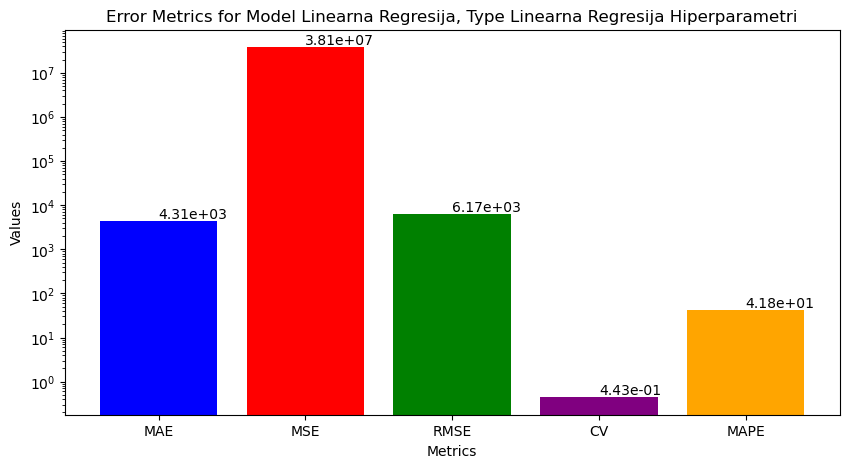

In [124]:
print_metrics(y_test,predictions,"Linearna Regresija","Linearna Regresija Hiperparametri")

In [125]:
modelLasso = Lasso()

In [126]:
# Definisanje parametarskog prostora za GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Kreiranje GridSearchCV objekta
grid_search = GridSearchCV(estimator=modelLasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treniranje modela sa različitim kombinacijama hiperparametara
grid_search.fit(X_train_scaled, y_train)

# Prikazivanje najboljih parametara
print("Najbolji parametri: ", grid_search.best_params_)

# Prikazivanje najboljih performansi
print("Najbolji MSE: ", -grid_search.best_score_)

# Evaluacija na test skupu
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("R^2 na test skupu: ", test_score)

C:\Users\Anjica\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.471e+09, tolerance: 1.166e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjica\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.600e+09, tolerance: 1.287e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjica\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+09, toler

Najbolji parametri:  {'alpha': 100, 'fit_intercept': True, 'positive': False}
Najbolji MSE:  145396427.30903986
R^2 na test skupu:  -0.0088187344055779


In [127]:
najbolji_parametri=grid_search.best_params_

In [128]:
najbolji_parametri

{'alpha': 100, 'fit_intercept': True, 'positive': False}

In [129]:
modelNovi=Lasso(**najbolji_parametri)

In [130]:
modelNovi.fit(X_train,y_train)

Lasso(alpha=100)

In [131]:
predictions=modelNovi.predict(X_test)

Model Linearna Regresija, Type Lasso Hiperparametri
Mean Absolute Error: 4348.254498643875
Mean Squared Error: 38248931.86251164
Root Mean Squared Error: 6184.572084025834
Coefficient of Variation (y_true): 0.44430206250756904
Mean Absolute Percentage Error: 42.995599227800874%


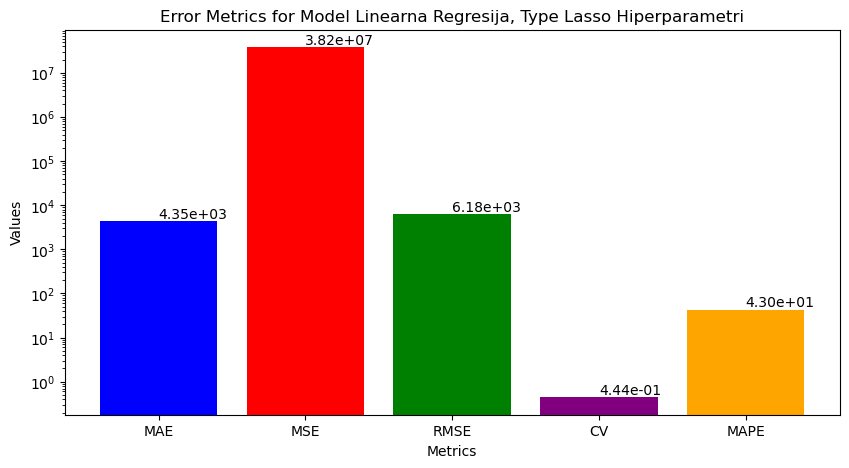

In [132]:
print_metrics(y_test,predictions,"Linearna Regresija","Lasso Hiperparametri")

In [133]:
modelRidge = Ridge()

In [134]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Kreiranje GridSearchCV objekta
grid_search = GridSearchCV(estimator=modelRidge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treniranje modela sa različitim kombinacijama hiperparametara
grid_search.fit(X_train_scaled, y_train)

# Prikazivanje najboljih parametara
print("Najbolji parametri: ", grid_search.best_params_)

# Prikazivanje najboljih performansi
print("Najbolji MSE: ", -grid_search.best_score_)

# Evaluacija na test skupu
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("R^2 na test skupu: ", test_score)

Najbolji parametri:  {'alpha': 100, 'fit_intercept': True, 'positive': True}
Najbolji MSE:  145439827.93777877
R^2 na test skupu:  0.0018288695254602416


In [135]:
najbolji_parametri=grid_search.best_params_

In [136]:
najbolji_parametri

{'alpha': 100, 'fit_intercept': True, 'positive': True}

In [137]:
modelNovi=Ridge(**najbolji_parametri)

In [138]:
modelNovi.fit(X_train,y_train)

Ridge(alpha=100, positive=True)

In [139]:
predictions=modelNovi.predict(X_test)

Model Linearna Regresija, Type Ridge Hiperparametri
Mean Absolute Error: 5157.829209869882
Mean Squared Error: 51468968.773369916
Root Mean Squared Error: 7174.187673414316
Coefficient of Variation (y_true): 0.5153964311204954
Mean Absolute Percentage Error: 56.62701668966344%


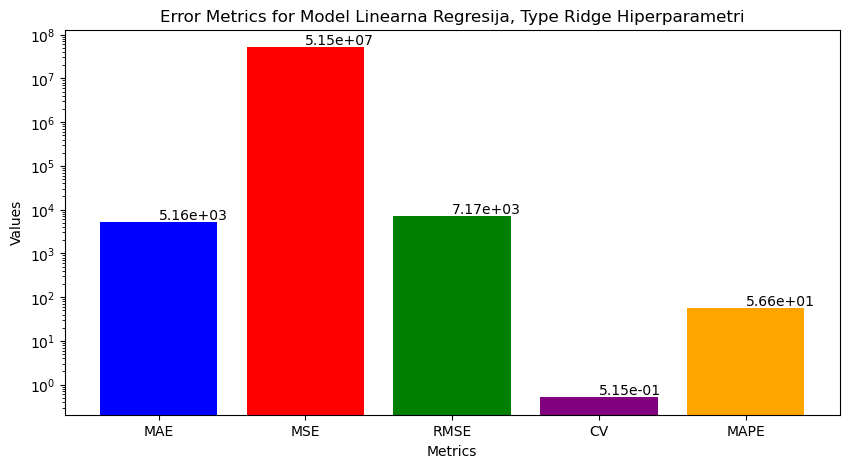

In [140]:
print_metrics(y_test,predictions,"Linearna Regresija","Ridge Hiperparametri")

In [141]:
model = SVR()

# Definisanje parametarskog prostora za GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Kreiranje GridSearchCV objekta
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treniranje modela sa različitim kombinacijama hiperparametara
grid_search.fit(X_train_scaled, y_train)

# Prikazivanje najboljih parametara
print("Najbolji parametri: ", grid_search.best_params_)

# Prikazivanje najboljih performansi
print("Najbolji MSE: ", -grid_search.best_score_)

# Evaluacija na test skupu
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("R^2 na test skupu: ", test_score)


Najbolji parametri:  {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
Najbolji MSE:  159733722.76974434
R^2 na test skupu:  -0.14301955241691555


In [142]:
najbolji_parametri=grid_search.best_params_

In [143]:
najbolji_parametri

{'C': 10, 'epsilon': 1, 'kernel': 'rbf'}

In [144]:
modelNovi=SVR(**najbolji_parametri)

In [145]:
modelNovi.fit(X_train,y_train)

SVR(C=10, epsilon=1)

In [146]:
predictions=modelNovi.predict(X_test)

Model Support Vector Regressor, Type SVR Hiperparametri
Mean Absolute Error: 8363.67439613685
Mean Squared Error: 175370238.13565516
Root Mean Squared Error: 13242.742847901833
Coefficient of Variation (y_true): 0.9513637937501588
Mean Absolute Percentage Error: 82.21191660209904%


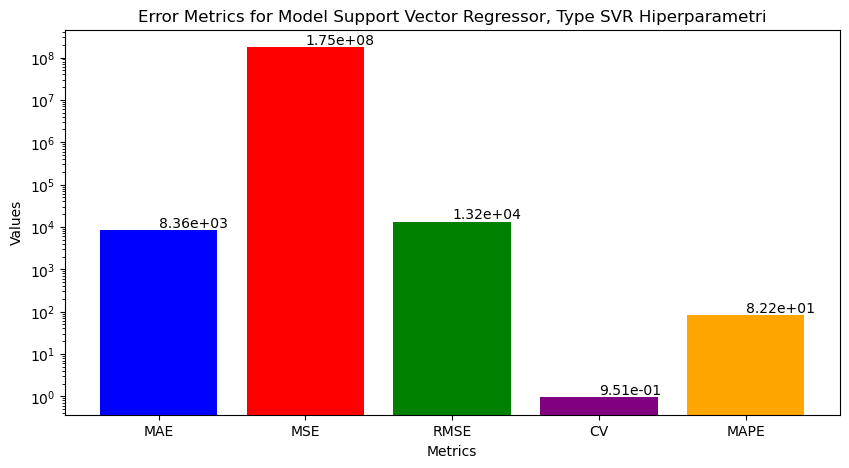

In [147]:
print_metrics(y_test,predictions,"Support Vector Regressor","SVR Hiperparametri")

In [162]:
model = DecisionTreeRegressor()

# Definisanje parametarskog prostora za GridSearchCV
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Kreiranje GridSearchCV objekta
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treniranje modela sa različitim kombinacijama hiperparametara
grid_search.fit(X_train_scaled, y_train)

# Prikazivanje najboljih parametara
print("Najbolji parametri: ", grid_search.best_params_)

# Prikazivanje najboljih performansi
print("Najbolji MSE: ", -grid_search.best_score_)

# Evaluacija na test skupu
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("R^2 na test skupu: ", test_score)

Najbolji parametri:  {'criterion': 'friedman_mse', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Najbolji MSE:  166908783.62337452
R^2 na test skupu:  -0.2821585124823256


In [149]:
najbolji_parametri=grid_search.best_params_

In [150]:
najbolji_parametri

{'criterion': 'poisson',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [151]:
modelNovi=DecisionTreeRegressor(**najbolji_parametri)

In [152]:
modelNovi.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=4,
                      splitter='random')

In [153]:
predictions=modelNovi.predict(X_test)

Model Decision Tree Regressor, Type DTR Hiperparametri
Mean Absolute Error: 2754.054814894001
Mean Squared Error: 25542040.44368093
Root Mean Squared Error: 5053.913379123244
Coefficient of Variation (y_true): 0.36307510165155604
Mean Absolute Percentage Error: 30.113897457532474%


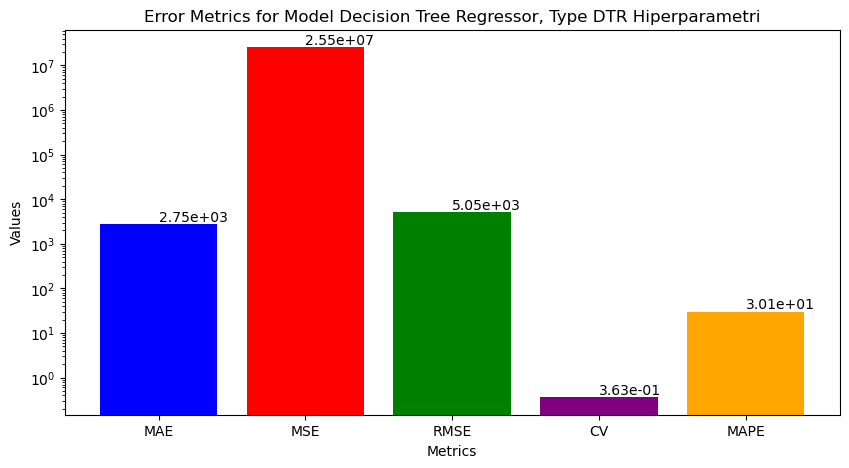

In [154]:
print_metrics(y_test,predictions,"Decision Tree Regressor","DTR Hiperparametri")

In [155]:
from sklearn.decomposition import PCA
# Kreiranje PCA modela
pca = PCA()  # Standardni PCA bez specifičnog broja komponenti

# Treniranje PCA modela na trening podacima
X_train_pca = pca.fit_transform(X_train_scaled)

# Transformacija test podataka
X_test_pca = pca.transform(X_test_scaled)

# Prikazivanje broja komponenti i procenta varijanse zadržanog svakom komponentom
print("Broj komponenti: ", pca.n_components_)
print("Procenat varijanse zadržan svakom komponentom: ", pca.explained_variance_ratio_)
print("Ukupan procenat varijanse zadržan: ", np.sum(pca.explained_variance_ratio_))

# Ako želiš da zadržiš samo prve n komponente
n = 5  # Na primer, 5 komponenti
pca_n = PCA(n_components=n)
X_train_pca_n = pca_n.fit_transform(X_train_scaled)
X_test_pca_n = pca_n.transform(X_test_scaled)

print(f"Prvih {n} komponenti zadržava ovoliko varijanse: ", np.sum(pca_n.explained_variance_ratio_))

Broj komponenti:  9
Procenat varijanse zadržan svakom komponentom:  [1.74082219e-01 1.48066969e-01 1.46490010e-01 1.21388979e-01
 1.15769386e-01 1.08513814e-01 1.02539219e-01 8.31494039e-02
 5.40593340e-33]
Ukupan procenat varijanse zadržan:  1.0
Prvih 5 komponenti zadržava ovoliko varijanse:  0.7057975634259841


In [156]:
 # Na primer, 5 komponenti
varijanse=[]
for i in range(5,X_train_scaled.shape[1]+1):
    pca_n = PCA(n_components=i)
    X_train_pca_n = pca_n.fit_transform(X_train_scaled)
    X_test_pca_n = pca_n.transform(X_test_scaled)
    
    print(f"Prvih {i} komponenti zadržava ovoliko varijanse: ", np.sum(pca_n.explained_variance_ratio_))
    varijanse.append(np.sum(pca_n.explained_variance_ratio_))

Prvih 5 komponenti zadržava ovoliko varijanse:  0.7057975634259844
Prvih 6 komponenti zadržava ovoliko varijanse:  0.8143113772658976
Prvih 7 komponenti zadržava ovoliko varijanse:  0.9168505961403515
Prvih 8 komponenti zadržava ovoliko varijanse:  1.0
Prvih 9 komponenti zadržava ovoliko varijanse:  1.0


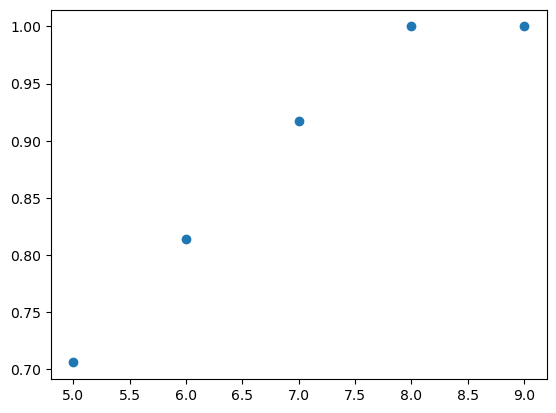

In [157]:
plt.scatter(x=[x for x in range(5,9+1)],y=varijanse)

In [158]:
metrika

{'Linearna Regresija': {'Linear Regresija Standard Scaler': {'MAE': 4347.849988543627,
   'MSE': 38985507.63142416,
   'RMSE': 6243.83757247289,
   'CV': 0.46259358500189285,
   'MAPE': 41.95968081398973},
  'Linear Regresija MinMax Scaler': {'MAE': 4347.849988543627,
   'MSE': 38985507.63142415,
   'RMSE': 6243.83757247289,
   'CV': 0.46259358500189285,
   'MAPE': 41.95968081398977},
  'Lasso Standard Scaler': {'MAE': 4347.805006114386,
   'MSE': 38984910.24373242,
   'RMSE': 6243.789734106396,
   'CV': 0.4625900407518703,
   'MAPE': 41.95901980991256},
  'Lasso MinMax Scaler': {'MAE': 4347.621265956909,
   'MSE': 38984128.22394713,
   'RMSE': 6243.727109983838,
   'CV': 0.46258540105440454,
   'MAPE': 41.954346316908875},
  'Ridge Standard Scaler': {'MAE': 4348.387829998111,
   'MSE': 38972555.012195736,
   'RMSE': 6242.80025406834,
   'CV': 0.46251673213152594,
   'MAPE': 41.97498912994191},
  'Ridge MinMax Scaler': {'MAE': 4336.340290494808,
   'MSE': 38932310.61450665,
   'RMSE': 

In [159]:
best_variants = {}

for algorithm, variants in metrika.items():
    best_variant = min(variants, key=lambda x: variants[x]['MAE'])
    best_variants[algorithm] = {
        'variant': best_variant,
        'MAE': variants[best_variant]['MAE'],
        'MSE': variants[best_variant]['MSE'],
        'RMSE': variants[best_variant]['RMSE']
    }

print("Najbolje varijante za svaki algoritam:")
for algo, metrics in best_variants.items():
    print(f"{algo} - {metrics['variant']}: MAE={metrics['MAE']}, MSE={metrics['MSE']}, RMSE={metrics['RMSE']}")

# Pronalaženje generalno najboljeg algoritma i varijante
best_algorithm = min(best_variants, key=lambda x: best_variants[x]['MSE'])
best_algorithm_metrics = best_variants[best_algorithm]

print("\nNajbolji algoritam i varijanta:")
print(f"{best_algorithm} - {best_algorithm_metrics['variant']}: MAE={best_algorithm_metrics['MAE']}, MSE={best_algorithm_metrics['MSE']}, RMSE={best_algorithm_metrics['RMSE']}")

Najbolje varijante za svaki algoritam:
Linearna Regresija - Linearna Regresija Hiperparametri: MAE=4307.522374622015, MSE=38094978.314431496, RMSE=6172.112953797224
Support Vector Regressor - SVR Hiperparametri: MAE=8363.67439613685, MSE=175370238.13565516, RMSE=13242.742847901833
Decision Tree Regressor - DTR Hiperparametri: MAE=2754.054814894001, MSE=25542040.44368093, RMSE=5053.913379123244
Neural Network - 19 slojeva relu: MAE=3793.9945852149176, MSE=45470928.89848873, RMSE=6743.213543889051

Najbolji algoritam i varijanta:
Decision Tree Regressor - DTR Hiperparametri: MAE=2754.054814894001, MSE=25542040.44368093, RMSE=5053.913379123244


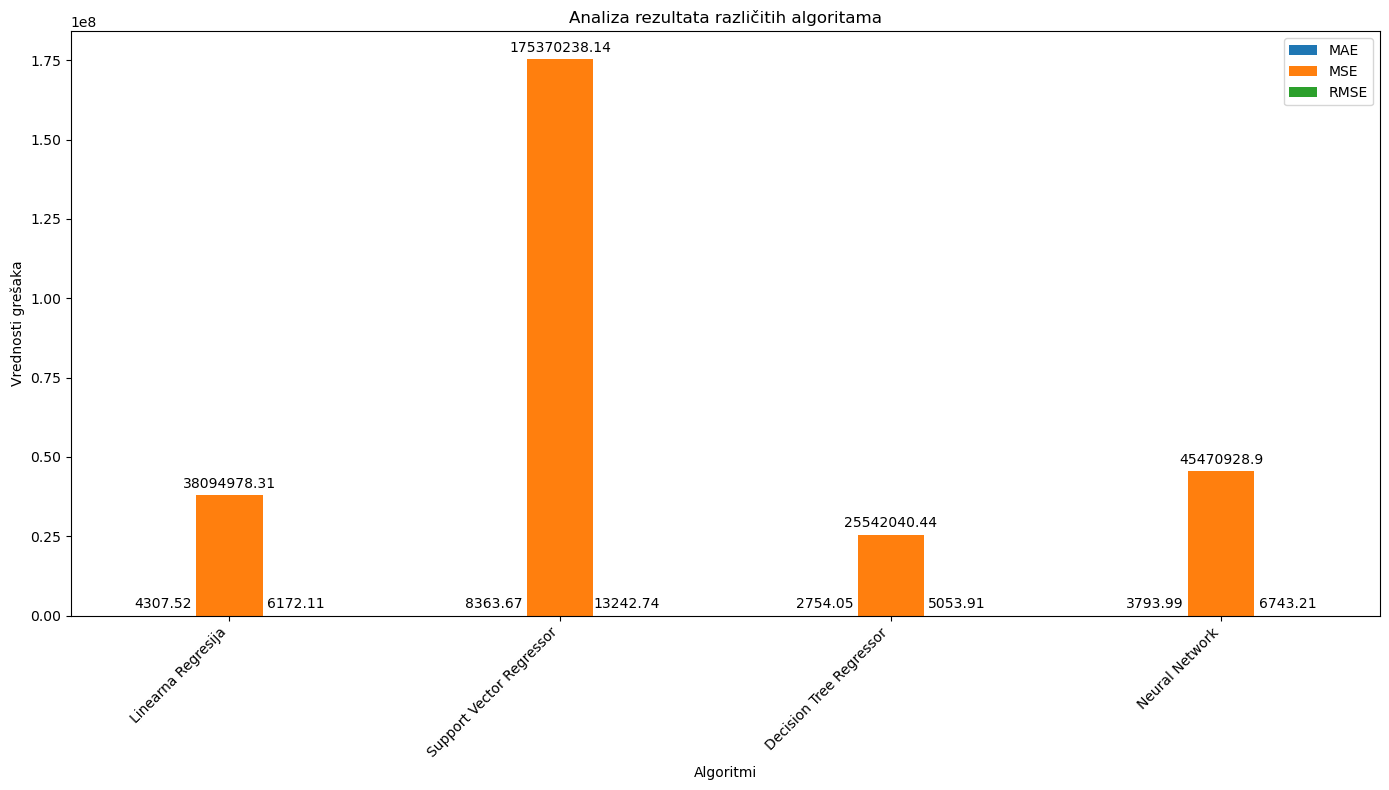

In [160]:
# Podaci o najboljoj varijanti za svaki algoritam
algorithms = list(best_variants.keys())
mae_values = [best_variants[algo]['MAE'] for algo in algorithms]
mse_values = [best_variants[algo]['MSE'] for algo in algorithms]
rmse_values = [best_variants[algo]['RMSE'] for algo in algorithms]

x = np.arange(len(algorithms))  # Lokacija za oznake na x osi
width = 0.2  # Širina kolona

fig, ax = plt.subplots(figsize=(14, 8))

# Kreiranje kolona za MAE, MSE i RMSE vrednosti
rects1 = ax.bar(x - width, mae_values, width, label='MAE')
rects2 = ax.bar(x, mse_values, width, label='MSE')
rects3 = ax.bar(x + width, rmse_values, width, label='RMSE')

# Dodavanje oznaka na x osi
ax.set_xlabel('Algoritmi')
ax.set_ylabel('Vrednosti grešaka')
ax.set_title('Analiza rezultata različitih algoritama')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha="right")
ax.legend()

# Dodavanje vrednosti iznad kolona
def autolabel(rects):
    """Dodaje vrednosti iznad kolona."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [161]:
metrika


{'Linearna Regresija': {'Linear Regresija Standard Scaler': {'MAE': 4347.849988543627,
   'MSE': 38985507.63142416,
   'RMSE': 6243.83757247289,
   'CV': 0.46259358500189285,
   'MAPE': 41.95968081398973},
  'Linear Regresija MinMax Scaler': {'MAE': 4347.849988543627,
   'MSE': 38985507.63142415,
   'RMSE': 6243.83757247289,
   'CV': 0.46259358500189285,
   'MAPE': 41.95968081398977},
  'Lasso Standard Scaler': {'MAE': 4347.805006114386,
   'MSE': 38984910.24373242,
   'RMSE': 6243.789734106396,
   'CV': 0.4625900407518703,
   'MAPE': 41.95901980991256},
  'Lasso MinMax Scaler': {'MAE': 4347.621265956909,
   'MSE': 38984128.22394713,
   'RMSE': 6243.727109983838,
   'CV': 0.46258540105440454,
   'MAPE': 41.954346316908875},
  'Ridge Standard Scaler': {'MAE': 4348.387829998111,
   'MSE': 38972555.012195736,
   'RMSE': 6242.80025406834,
   'CV': 0.46251673213152594,
   'MAPE': 41.97498912994191},
  'Ridge MinMax Scaler': {'MAE': 4336.340290494808,
   'MSE': 38932310.61450665,
   'RMSE': 